<a href="https://colab.research.google.com/github/wernenveiga/fundamentos-de-ci-ncia-de-dados/blob/main/Teste_de_Hip%C3%B3tese_F(ANOVA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Teste de Hipótese F(ANOVA)

##Bibliotecas

In [19]:
import pandas as pd
import scipy.stats as stats

##Arquvio

In [9]:
arquivo = '/content/mamalia_sleep.csv'
df_mamiferos = pd.read_csv(arquivo)
df_mamiferos.columns

Index(['name', 'genus', 'vore', 'order', 'conservation', 'sleep_total',
       'sleep_rem', 'sleep_cycle', 'awake', 'brainwt', 'bodywt'],
      dtype='object')

In [10]:
df_mamiferos = df_mamiferos.query("vore in ('carni', 'herbi', 'omni')")
df_mamiferos.describe()

,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
count,71.000000,52.000000,28.000000,71.000000,46.000000,71.000000
mean,10.140845,1.748077,0.478571,13.860563,0.339623,193.221169
std,4.345197,1.215987,0.367363,4.347174,1.070437,848.562662
min,1.900000,0.100000,0.116667,4.600000,0.000140,0.005000
25%,7.000000,0.900000,0.212500,10.350000,0.005125,0.293000
50%,10.100000,1.400000,0.366667,13.900000,0.016500,2.500000
75%,13.650000,2.400000,0.666667,17.000000,0.173500,52.690000
max,19.400000,6.600000,1.500000,22.100000,5.712000,6654.000000


##Teste 1 - One Way F-Test



In [11]:
#Análise de variancia
df_anova = df_mamiferos[['sleep_total','vore']]

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


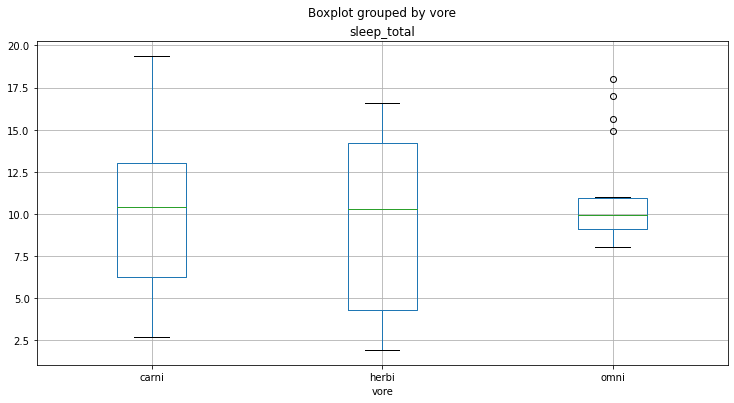

In [12]:
df_anova.boxplot('sleep_total', by='vore', figsize=(12, 6))

In [13]:
dietas = pd.unique(df_anova.vore.values)

### Construindo o Dicionário

In [17]:
testef1_df = {dt:df_anova['sleep_total'][df_anova.vore == dt] for dt in dietas}
testef1_df

{'carni': 0     12.1
 6      8.7
 8     10.1
 17    17.4
 27    12.5
 30     2.7
 31     6.2
 36    19.4
 44    11.0
 46    14.5
 50    15.8
 51    10.4
 52    13.5
 58     3.5
 59     5.6
 79     5.2
 80     6.3
 81    12.5
 82     9.8
 Name: sleep_total, dtype: float64, 'herbi': 2     14.4
 4      4.0
 5     14.4
 9      3.0
 10     5.3
 11     9.4
 13    12.5
 18     5.3
 20     3.9
 22     2.9
 23     3.1
 26    14.9
 29     1.9
 32     6.3
 34     9.5
 35     3.3
 38    14.2
 39    14.3
 40    12.8
 41    12.5
 43    14.6
 45     7.7
 47     8.4
 48     3.8
 60    11.1
 63    13.0
 67    11.3
 69    16.6
 70    13.8
 71    15.9
 75    15.8
 76     4.4
 Name: sleep_total, dtype: float64, 'omni': 1     17.0
 3     14.9
 12    10.0
 14    10.3
 15     8.3
 16     9.1
 19    18.0
 24    10.1
 25    10.9
 28     9.8
 33     8.0
 37    10.1
 49     9.7
 53     9.4
 55    11.0
 64     8.7
 65     9.6
 73     9.1
 77    15.6
 78     8.9
 Name: sleep_total, dtype: float64}

In [20]:
F_stats, p_value = stats.f_oneway(testef1_df['carni'], testef1_df['herbi'], testef1_df['omni'])

In [22]:
if p_value < 0.05:
  print('Rejeitar a H0, a variancia dos grupos analisados se difere do grupo de fora')
else:
  print('Falhar em rejeitar a H0, ou seja a variancia dos grupos analisados é semelhante aos grupos de fora')

Falhar em rejeitar a H0, ou seja a variancia dos grupos analisados é semelhante aos grupos de fora


## Teste 2 - Two Way F-test

In [28]:
import statsmodels.api as fm
from statsmodels.formula.api import ols

In [30]:
modelo = ols("sleep_total ~ vore * order", df_mamiferos).fit()
modelo

In [31]:
print("df(ºLibertade) = %.0f, p = %.12f, res(erro da previsão) = %.0f, F-value = %.3f" % (modelo.df_model, modelo.f_pvalue, modelo.df_resid, modelo.fvalue))

df(ºLibertade) = 22, p = 0.000000004894, res(erro da previsão) = 48, F-value = 7.334


In [35]:
if modelo.f_pvalue < 0.05:
  print("Rejeitar a H0, pois há uma diferença de sono levando em consideração a dieta e a ordem")
else:
  print("Não rejeitar a H0, pois não há uma diferença de sono levando em consideração a dieta e a ordem")

Rejeitar a H0, pois há uma diferença de sono levando em consideração a dieta e a ordem


In [37]:
prob = 0.95
n = df_mamiferos.sleep_total.count()
a_vore = 3
a_order = len(df_mamiferos.order.unique().tolist())

In [39]:
#valor de A, total de grupos
a = (a_vore - 1) * (a_order - 1)
a

32

In [42]:
#primeiro grau de liberdade (dfn)
dfn = a - 1
dfn

31

In [43]:
#segundo grau de liberdade (dfd)
dfd = n - a
dfd

39

In [45]:
valor_critico = stats.f.ppf(prob, dfn, dfd)
valor_critico

1.745354510595028

In [47]:
if modelo.fvalue > valor_critico:
  print("Rejeitar a H0, pois há uma diferença de sono levando em consideração a dieta e a ordem")
else:
  print("Não Rejeitar a H0, pois não há uma diferença de sono levando em consideração a dieta e a ordem")

Rejeitar a H0, pois há uma diferença de sono levando em consideração a dieta e a ordem
